In [1]:
!pip install --user tensorflow matplotlib librosa scipy keras pandas tqdm

In [2]:
import pandas as pd
import os
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
%matplotlib inline

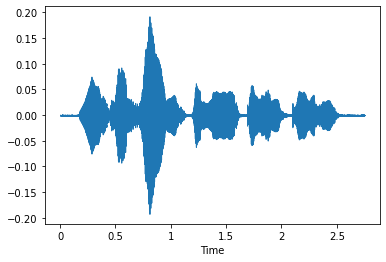

In [3]:
file_name='dataset/Anger/1-1.wav'

audio_data, sampling_rate = librosa.load(file_name)
librosa.display.waveshow(audio_data,sr=sampling_rate)
ipd.Audio(file_name)

In [4]:
audio_data

array([0.00017889, 0.0003181 , 0.00029281, ..., 0.00022961, 0.00028535,
       0.        ], dtype=float32)

In [5]:
sampling_rate

22050

In [6]:
import csv
fieldHeader = ['filename', 'classNum', 'className']

individualField = []

fields = []

int2emotion = {
    "1": "Anger",
    "2": "Anxious",
    "3": "Apologetic",
    "4": "Concerned",
    "5": "Encouraging",
    "6": "Excited",
    "7": "Happiness",
    "8": "Sadness"
}

for file in glob.glob("dataset/*/*.wav"):
        basename = os.path.basename(file)        
        emotionNum = basename.split("-")[0]
        emotion = int2emotion[emotionNum]
        
        individualField.append(basename)
        individualField.append(emotionNum)
        individualField.append(emotion)
        
        fields.append(individualField)
        individualField = []


with open("data.csv", 'w') as csvfile:
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)

    # writing the fields 
    csvwriter.writerow(fieldHeader) 

    # writing the data rows 
    csvwriter.writerows(fields)

In [7]:
audio_dataset_path='Dataset/'
metadata=pd.read_csv('data.csv')
metadata.head()

,filename,classNum,className
0,1-1.wav,1,Anger
1,1-10.wav,1,Anger
2,1-100.wav,1,Anger
3,1-101.wav,1,Anger
4,1-102.wav,1,Anger


In [8]:
metadata['className'].value_counts()

Anger          240
Anxious        240
Apologetic     240
Concerned      240
Encouraging    240
Excited        240
Happiness      240
Sadness        240
Name: className, dtype: int64

In [9]:
metadata.shape

(1920, 3)

In [10]:
mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)

In [11]:
mfccs

array([[-7.1296796e+02, -7.0544385e+02, -7.0655298e+02, ...,
        -7.1708478e+02, -7.1817487e+02, -7.1576434e+02],
       [ 3.5860611e+01,  4.2668274e+01,  4.1444702e+01, ...,
         2.9511253e+01,  2.8146446e+01,  3.2493889e+01],
       [ 3.0329643e+01,  3.5177361e+01,  3.6475239e+01, ...,
         3.0290154e+01,  2.8316811e+01,  3.0863136e+01],
       ...,
       [-3.9452376e+00, -1.1622849e+00,  3.4012451e+00, ...,
        -5.9160352e-01, -5.1876122e-01,  3.5050544e-01],
       [-3.3441992e+00, -5.6108278e-01,  3.3603771e+00, ...,
         1.2367365e+00,  6.1816657e-01,  1.4932015e+00],
       [-3.0633235e+00, -2.0530293e+00, -6.5501225e-01, ...,
        -2.9159427e-01, -9.4075978e-01,  1.0578656e+00]], dtype=float32)

In [12]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [13]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
#     file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["filename"]))
    file_name = "Dataset/"+row['className']+"/"+row['filename']
    final_class_labels=row["className"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1920it [21:24,  1.49it/s]


In [104]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [162]:
extracted_features

[[array([-4.7555399e+02,  9.5947395e+01, -8.0418473e-01,  2.2639591e+01,
         -4.3835320e+00, -1.7040808e+00, -4.0203710e+00,  7.6567135e+00,
         -1.7761560e+01,  4.0876312e+00, -8.6066952e+00, -1.2263545e+00,
         -7.2141323e+00, -3.5382962e-01, -3.3798738e+00, -1.4410414e+00,
         -5.8529577e+00, -2.3292506e+00, -6.6752787e+00, -2.4507661e+00,
         -6.4352741e+00, -2.2743165e+00, -4.9825397e+00,  3.7680677e-01,
         -2.4204738e+00,  1.9355872e-01,  3.1084867e+00,  7.7550101e+00,
          5.2753472e+00,  7.9517775e+00,  8.1394634e+00,  3.5019796e+00,
          2.7612488e+00,  4.9154162e+00,  7.2741771e+00,  7.1645284e+00,
          6.0738544e+00,  2.2591336e+00,  1.0421064e+00, -3.8088918e-02],
        dtype=float32),
  'Anger'],
 [array([-387.1153    ,   70.72266   ,  -23.02205   ,   17.691051  ,
            4.3131433 ,    4.179121  ,  -14.34477   ,    1.474738  ,
          -20.610434  ,    2.2763112 ,  -20.971874  ,    4.075678  ,
           -8.726877  ,   

In [165]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.to_csv("features_data.csv")

In [159]:
# extracted_features_df = pd.read_csv("features_data.csv", usecols=['feature','class'])
# extracted_features_df.head(10)

,feature,class
0,[-4.7555399e+02 9.5947395e+01 -8.0418473e-01 ...,Anger
1,[-387.1153 70.72266 -23.02205 1...,Anger
2,[-4.0937262e+02 5.4361401e+01 -2.2986191e+01 ...,Anger
3,[-4.3307462e+02 4.5086483e+01 2.9571106e+00 ...,Anger
4,[-4.19569031e+02 4.83095055e+01 2.33137298e+...,Anger
5,[-4.4195093e+02 4.6088947e+01 3.1653194e+00 ...,Anger
6,[-4.4201132e+02 4.7888359e+01 2.5221081e+00 ...,Anger
7,[-4.0837485e+02 4.6945530e+01 -1.5460953e+01 ...,Anger
8,[-406.5429 57.928795 -16.666927 3...,Anger
9,[-4.6578799e+02 4.5531036e+01 -5.1767931e+00 ...,Anger


In [166]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [167]:
X.shape

(1920, 40)

In [169]:
y

array(['Anger', 'Anger', 'Anger', ..., 'Sadness', 'Sadness', 'Sadness'],
      dtype='<U11')

In [170]:
y.shape

(1920,)

In [171]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [172]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [173]:
y.shape

(1920, 8)

In [174]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras import layers


In [177]:
num_labels=y.shape[1]

In [9]:
model=Sequential()
initializer = tf.keras.initializers.Orthogonal()

###first layer
model.add(Dense(64,input_shape=(40,)))
model.add(Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.3))

###second layer
model.add(Dense(128, kernel_initializer=initializer))
model.add(Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.3))

###third layer
model.add(Dense(256, kernel_initializer=initializer))
model.add(Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.3))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

NameError: name 'num_labels' is not defined

In [704]:
model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_212 (Dense)           (None, 64)                2624      
                                                                 
 activation_212 (Activation)  (None, 64)               0         
                                                                 
 batch_normalization_138 (Ba  (None, 64)               256       
 tchNormalization)                                               
                                                                 
 dropout_158 (Dropout)       (None, 64)                0         
                                                                 
 dense_213 (Dense)           (None, 128)               8320      
                                                                 
 activation_213 (Activation)  (None, 128)              0         
                                                     

In [705]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [706]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 1000
num_batch_size = 512

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=0, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1000
3/3 [==============================] - 1s 100ms/step - loss: 2.7294 - accuracy: 0.1543 - val_loss: 11.8312 - val_accuracy: 0.1302
Epoch 2/1000
3/3 [==============================] - 0s 28ms/step - loss: 2.2051 - accuracy: 0.2578 - val_loss: 12.6811 - val_accuracy: 0.1432
Epoch 3/1000
3/3 [==============================] - 0s 30ms/step - loss: 2.0133 - accuracy: 0.2962 - val_loss: 13.5095 - val_accuracy: 0.1510
Epoch 4/1000
3/3 [==============================] - 0s 26ms/step - loss: 1.9331 - accuracy: 0.3340 - val_loss: 13.4241 - val_accuracy: 0.1328
Epoch 5/1000
3/3 [==============================] - 0s 28ms/step - loss: 1.8229 - accuracy: 0.3372 - val_loss: 13.1322 - val_accuracy: 0.1302
Epoch 6/1000
3/3 [==============================] - 0s 27ms/step - loss: 1.7485 - accuracy: 0.3451 - val_loss: 13.0128 - val_accuracy: 0.1302
Epoch 7/1000
3/3 [==============================] - 0s 22ms/step - loss: 1.6970 - accuracy: 0.3698 - val_loss: 12.2893 - val_accuracy: 0.1302
Epoch

Epoch 59/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.9286 - accuracy: 0.6211 - val_loss: 1.0323 - val_accuracy: 0.5859
Epoch 60/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.9380 - accuracy: 0.6055 - val_loss: 1.0652 - val_accuracy: 0.5677
Epoch 61/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.9470 - accuracy: 0.6217 - val_loss: 1.0771 - val_accuracy: 0.5677
Epoch 62/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.9134 - accuracy: 0.6296 - val_loss: 1.0717 - val_accuracy: 0.5807
Epoch 63/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.9126 - accuracy: 0.6159 - val_loss: 1.0761 - val_accuracy: 0.5807
Epoch 64/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.8883 - accuracy: 0.6243 - val_loss: 1.0975 - val_accuracy: 0.5651
Epoch 65/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.9135 - accuracy: 0.6211 - val_loss: 1.1386 - val_accuracy: 0.5521
Epoch 

3/3 [==============================] - 0s 17ms/step - loss: 0.5280 - accuracy: 0.7962 - val_loss: 0.8771 - val_accuracy: 0.6667
Epoch 174/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5343 - accuracy: 0.7904 - val_loss: 0.8191 - val_accuracy: 0.6823
Epoch 175/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.5266 - accuracy: 0.7858 - val_loss: 0.7334 - val_accuracy: 0.7083
Epoch 176/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.5230 - accuracy: 0.8132 - val_loss: 0.7575 - val_accuracy: 0.7057
Epoch 177/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5052 - accuracy: 0.8014 - val_loss: 0.8500 - val_accuracy: 0.6823
Epoch 178/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5241 - accuracy: 0.7982 - val_loss: 0.9332 - val_accuracy: 0.6432
Epoch 179/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5214 - accuracy: 0.7910 - val_loss: 1.0217 - val_accuracy: 0.6120
Epoch 180/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.4027 - accuracy: 0.8451 - val_loss: 0.5422 - val_accuracy: 0.8021
Epoch 288/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4258 - accuracy: 0.8307 - val_loss: 0.5734 - val_accuracy: 0.7812
Epoch 289/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3925 - accuracy: 0.8398 - val_loss: 0.5278 - val_accuracy: 0.7865
Epoch 290/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4082 - accuracy: 0.8444 - val_loss: 0.4410 - val_accuracy: 0.8333
Epoch 291/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4020 - accuracy: 0.8503 - val_loss: 0.4119 - val_accuracy: 0.8411
Epoch 292/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4016 - accuracy: 0.8464 - val_loss: 0.3791 - val_accuracy: 0.8464
Epoch 293/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3846 - accuracy: 0.8509 - val_loss: 0.3876 - val_accuracy: 0.8568
Epoch 294/1000

3/3 [==============================] - 0s 14ms/step - loss: 0.3288 - accuracy: 0.8783 - val_loss: 0.3981 - val_accuracy: 0.8438
Epoch 402/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.3184 - accuracy: 0.8796 - val_loss: 0.4286 - val_accuracy: 0.8281
Epoch 403/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3232 - accuracy: 0.8763 - val_loss: 0.4049 - val_accuracy: 0.8385
Epoch 404/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3138 - accuracy: 0.8815 - val_loss: 0.3744 - val_accuracy: 0.8724
Epoch 405/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3431 - accuracy: 0.8672 - val_loss: 0.3420 - val_accuracy: 0.8724
Epoch 406/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3380 - accuracy: 0.8757 - val_loss: 0.3329 - val_accuracy: 0.8724
Epoch 407/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3379 - accuracy: 0.8691 - val_loss: 0.3423 - val_accuracy: 0.8854
Epoch 408/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.2686 - accuracy: 0.9043 - val_loss: 0.3505 - val_accuracy: 0.8776
Epoch 516/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.2761 - accuracy: 0.8906 - val_loss: 0.3569 - val_accuracy: 0.8776
Epoch 517/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.2658 - accuracy: 0.9049 - val_loss: 0.3449 - val_accuracy: 0.8776
Epoch 518/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.2885 - accuracy: 0.8913 - val_loss: 0.3311 - val_accuracy: 0.8828
Epoch 519/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.2719 - accuracy: 0.9004 - val_loss: 0.3471 - val_accuracy: 0.8776
Epoch 520/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3044 - accuracy: 0.8835 - val_loss: 0.3566 - val_accuracy: 0.8516
Epoch 521/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.2905 - accuracy: 0.8887 - val_loss: 0.3513 - val_accuracy: 0.8516
Epoch 522/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.2421 - accuracy: 0.9108 - val_loss: 0.3390 - val_accuracy: 0.8594
Epoch 630/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.2565 - accuracy: 0.9069 - val_loss: 0.3561 - val_accuracy: 0.8620
Epoch 631/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.2621 - accuracy: 0.9056 - val_loss: 0.3408 - val_accuracy: 0.8620
Epoch 632/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.2452 - accuracy: 0.9095 - val_loss: 0.3111 - val_accuracy: 0.8750
Epoch 633/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.2638 - accuracy: 0.8997 - val_loss: 0.3158 - val_accuracy: 0.8854
Epoch 634/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.2614 - accuracy: 0.9056 - val_loss: 0.3295 - val_accuracy: 0.8802
Epoch 635/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.2365 - accuracy: 0.9017 - val_loss: 0.3420 - val_accuracy: 0.8750
Epoch 636/1000

3/3 [==============================] - 0s 19ms/step - loss: 0.2186 - accuracy: 0.9180 - val_loss: 0.3273 - val_accuracy: 0.8880
Epoch 744/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.2461 - accuracy: 0.9056 - val_loss: 0.3418 - val_accuracy: 0.8854
Epoch 745/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.2510 - accuracy: 0.9049 - val_loss: 0.3380 - val_accuracy: 0.8828
Epoch 746/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.2441 - accuracy: 0.9102 - val_loss: 0.3561 - val_accuracy: 0.8646
Epoch 747/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.2455 - accuracy: 0.9043 - val_loss: 0.3902 - val_accuracy: 0.8490
Epoch 748/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.2459 - accuracy: 0.9089 - val_loss: 0.3982 - val_accuracy: 0.8464
Epoch 749/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.2267 - accuracy: 0.9167 - val_loss: 0.3937 - val_accuracy: 0.8438
Epoch 750/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.2278 - accuracy: 0.9199 - val_loss: 0.3139 - val_accuracy: 0.9036
Epoch 858/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.2262 - accuracy: 0.9258 - val_loss: 0.3043 - val_accuracy: 0.8984
Epoch 859/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.2522 - accuracy: 0.9010 - val_loss: 0.3387 - val_accuracy: 0.8958
Epoch 860/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.1962 - accuracy: 0.9284 - val_loss: 0.3721 - val_accuracy: 0.8750
Epoch 861/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.2070 - accuracy: 0.9251 - val_loss: 0.4053 - val_accuracy: 0.8620
Epoch 862/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.2559 - accuracy: 0.9115 - val_loss: 0.4405 - val_accuracy: 0.8568
Epoch 863/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.2466 - accuracy: 0.9069 - val_loss: 0.4312 - val_accuracy: 0.8568
Epoch 864/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.2196 - accuracy: 0.9271 - val_loss: 0.4438 - val_accuracy: 0.8568
Epoch 972/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.1809 - accuracy: 0.9316 - val_loss: 0.3998 - val_accuracy: 0.8620
Epoch 973/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.2064 - accuracy: 0.9245 - val_loss: 0.3398 - val_accuracy: 0.8776
Epoch 974/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1965 - accuracy: 0.9206 - val_loss: 0.3379 - val_accuracy: 0.8854
Epoch 975/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.2214 - accuracy: 0.9141 - val_loss: 0.3593 - val_accuracy: 0.8828
Epoch 976/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.2124 - accuracy: 0.9193 - val_loss: 0.3430 - val_accuracy: 0.8698
Epoch 977/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.1897 - accuracy: 0.9225 - val_loss: 0.3344 - val_accuracy: 0.8698
Epoch 978/1000

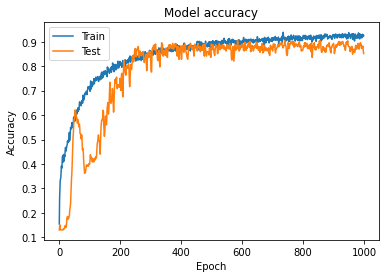

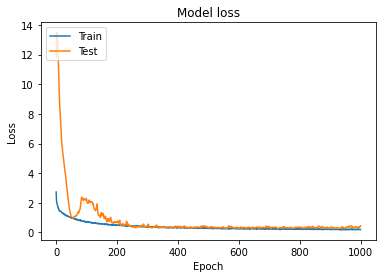

In [707]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
# plt.ylim([0.90,1.00])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
#plt.ylim([0,0.3])
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [708]:
loss, accuracy_d = model.evaluate(X_test, y_test, verbose=0)
print("Untrained model, accuracy: {:5.2f}%".format(100 * accuracy_d))

Untrained model, accuracy: 85.16%


In [709]:
model.load_weights("saved_models/audio_classification.hdf5")
# model.load_weights("models/87.5%.hdf5")

loss, accuracy_d = model.evaluate(X_test, y_test, verbose=0)
print("Restored model, accuracy: {:5.2f}%".format(100 * accuracy_d))

Restored model, accuracy: 90.10%


In [710]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9010416865348816


In [711]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

12/12 [==============================] - 0s 2ms/step


In [712]:
predict_x

array([[1.36464863e-04, 3.94082487e-01, 2.23487441e-04, ...,
        1.49807529e-04, 4.07519430e-01, 1.31823588e-03],
       [1.74553461e-05, 6.61696298e-09, 1.32723500e-07, ...,
        1.22967208e-07, 9.99264300e-01, 1.10497385e-05],
       [1.97976060e-05, 3.33347998e-04, 5.35330446e-06, ...,
        9.84586358e-01, 2.26237564e-04, 8.24792005e-06],
       ...,
       [9.38644111e-01, 5.56359999e-02, 9.31651186e-07, ...,
        5.55776712e-03, 2.15553609e-05, 4.37321478e-06],
       [3.81074644e-10, 1.11293605e-06, 9.99996781e-01, ...,
        1.75370585e-09, 2.32347978e-11, 1.18864352e-06],
       [1.53766955e-08, 2.72618124e-08, 2.23098556e-04, ...,
        3.18641895e-07, 3.58086731e-06, 9.95982647e-01]], dtype=float32)

In [713]:
classes_x

array([6, 6, 5, 7, 1, 1, 4, 3, 0, 0, 5, 3, 7, 0, 6, 1, 3, 3, 4, 4, 4, 0,
       7, 2, 4, 1, 7, 6, 0, 1, 1, 1, 5, 6, 6, 0, 6, 0, 3, 1, 6, 2, 5, 2,
       7, 2, 5, 7, 0, 0, 3, 5, 7, 3, 0, 4, 0, 6, 2, 0, 1, 2, 3, 5, 0, 2,
       0, 3, 3, 6, 4, 2, 0, 5, 0, 6, 6, 4, 4, 7, 2, 1, 3, 3, 3, 5, 7, 4,
       2, 4, 7, 1, 5, 0, 6, 3, 1, 6, 0, 0, 7, 0, 6, 2, 0, 0, 3, 5, 4, 4,
       7, 5, 3, 5, 6, 1, 6, 7, 7, 5, 7, 2, 6, 6, 5, 4, 1, 7, 5, 0, 4, 4,
       7, 1, 2, 3, 7, 6, 7, 7, 7, 4, 4, 0, 7, 3, 1, 3, 2, 5, 3, 2, 1, 5,
       2, 6, 3, 5, 2, 4, 2, 4, 0, 3, 5, 6, 5, 2, 7, 5, 3, 0, 5, 4, 6, 7,
       7, 3, 6, 1, 6, 6, 7, 2, 5, 0, 1, 1, 5, 5, 1, 3, 4, 3, 5, 0, 2, 1,
       1, 2, 6, 2, 5, 6, 2, 2, 3, 7, 4, 1, 0, 3, 1, 1, 7, 0, 7, 0, 0, 6,
       0, 7, 0, 5, 2, 5, 5, 4, 6, 2, 0, 4, 1, 5, 3, 7, 7, 7, 2, 3, 2, 1,
       4, 7, 0, 6, 7, 5, 7, 6, 6, 0, 6, 4, 4, 1, 3, 3, 2, 7, 6, 2, 2, 0,
       6, 0, 4, 0, 3, 2, 5, 0, 2, 6, 5, 4, 0, 0, 5, 3, 1, 2, 0, 7, 3, 3,
       1, 1, 2, 7, 0, 4, 5, 2, 3, 1, 4, 5, 0, 6, 6,

In [720]:
filename="../belly-button.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
prediction_class

[-2.3225046e+02  1.2986681e+02 -5.3791270e+00  3.2673038e+01
  4.6096233e-01  5.6892667e+00 -2.1123442e+01 -9.3515997e+00
 -9.9166899e+00 -3.2965219e+00 -1.0156494e+01 -1.0631847e+01
 -4.0894003e+00  4.1204057e+00 -1.9663547e+00  1.7616091e+00
 -2.4364064e+00 -8.4208345e+00 -3.7229745e+00 -4.8810582e+00
 -3.4046397e+00 -5.2847595e+00 -3.1203721e+00 -4.4567127e+00
 -2.2839072e+00 -5.4608188e+00 -3.3555136e+00 -6.6274846e-01
 -3.0693722e+00 -9.6366334e-01 -3.0356171e+00 -3.7128069e+00
  8.0621406e-02  5.0949240e-01 -1.8139819e+00  2.8850098e+00
 -2.2979057e+00 -1.8748841e+00 -1.1261533e+00 -2.3175652e+00]
[[-2.3225046e+02  1.2986681e+02 -5.3791270e+00  3.2673038e+01
   4.6096233e-01  5.6892667e+00 -2.1123442e+01 -9.3515997e+00
  -9.9166899e+00 -3.2965219e+00 -1.0156494e+01 -1.0631847e+01
  -4.0894003e+00  4.1204057e+00 -1.9663547e+00  1.7616091e+00
  -2.4364064e+00 -8.4208345e+00 -3.7229745e+00 -4.8810582e+00
  -3.4046397e+00 -5.2847595e+00 -3.1203721e+00 -4.4567127e+00
  -2.2839072e+00 

array(['Anger'], dtype='<U11')

In [297]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [11]:
model.load_weights("saved_models/audio_classification.hdf5")
# model.load_weights("models/87.5%.hdf5")

loss, accuracy_d = model.evaluate(X_test, y_test, verbose=0)
print("Restored model, accuracy: {:5.2f}%".format(100 * accuracy_d))

ValueError: Unable to load weights saved in HDF5 format into a subclassed Model which has not created its variables yet. Call the Model first, then load the weights.